# Understanding Descriptive Statistics

Import the necessary libraries here:

In [124]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [93]:
data = np.random.randint(1,6,size = 10)
data

array([2, 2, 5, 4, 1, 2, 2, 3, 5, 5])

In [94]:
len(data)

10

In [95]:
# Transform the array into a dataframe, called dice

dice = pd.DataFrame(data)
dice

,0
0,2
1,2
2,5
3,4
4,1
5,2
6,2
7,3
8,5
9,5


#### 2.- Plot the results sorted by value.

In [96]:
#Option 1: sort the array with np.sort

sorted_data = np.sort(data)
sorted_data


array([1, 2, 2, 2, 2, 3, 4, 5, 5, 5])

In [97]:
#Option 2: sort the dataframe dice

sorted_dice = dice.sort_values(by =0, ascending=True)
sorted_dice

,0
4,1
0,2
1,2
5,2
6,2
7,3
3,4
2,5
8,5
9,5


#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

In [98]:
# Option 1: calculate the most frequent value in the array data, which is 2 and it repeats 4 times

stats.mode(data)

ModeResult(mode=array([2]), count=array([4]))

In [99]:
#Option 2: we retrieve the most frequent value in our dataframe dice. The result is 2, however we don't know how many times the value 2 repeats.

dice.mode()

,0
0,2


In [135]:
#We see how many times each number repeats

freq_dist_dice = dice.value_counts().sort_index()
freq_dist_dice

1    1
2    4
3    1
4    1
5    3
dtype: int64

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [101]:
mean = np.sum(data)/len(data)
mean

3.1

In [102]:
#To verify if the mean is correct, we calculate the mean by using mean() on the dataframe dice

dice.mean()

0    3.1
dtype: float64

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [136]:
# We re-print the frequency distribution

freq_dist_dice

1    1
2    4
3    1
4    1
5    3
dtype: int64

In [137]:
# We print the length of the frequency distribition

len(freq_dist_dice)

5

In [138]:
# We compute the mean of the variable frequency distribution

mean_freq_dist_dice = np.sum(freq_dist_dice)/len(freq_dist_dice)
mean_freq_dist_dice

2.0

In [139]:
#To verify if the mean is correct, we calculate the mean by using mean() on the freq_dist

freq_dist_dice.mean()

2.0

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [107]:
np.sort(data)

array([1, 2, 2, 2, 2, 3, 4, 5, 5, 5])

In [133]:
# Calculate the median: 
# - Because the number of thrown dices is even, equal to 10, we need to pick the 2 central values which are indexes 4 and 5
# - Pyhthon indexing starts on 0

median = (np.sort(data)[4] + np.sort(data)[5])/2
median

2.5

In [134]:
# To verify if the frequency distribution is correct, I will calculate the median by using a method

np.median(data)

2.5

### Optional
#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [110]:
# your code here

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

In [150]:
#Read the csv file

roll_the_dice_hund = pd.read_csv('/Users/GiadaSartori/Documents/IRONHACK/Lab/Week4/Descriptive-Stats/data/roll_the_dice_hundred.csv')
roll_the_dice_hund.head(10)

,Unnamed: 0,roll,value
0,0,0,1
1,1,1,2
2,2,2,6
3,3,3,1
4,4,4,6
5,5,5,5
6,6,6,2
7,7,7,2
8,8,8,4
9,9,9,1


In [151]:
#Sort the values by column 'value'

roll_the_dice_hund.sort_values('value')

,Unnamed: 0,roll,value
0,0,0,1
47,47,47,1
56,56,56,1
9,9,9,1
73,73,73,1
...,...,...,...
17,17,17,6
11,11,11,6
24,24,24,6
21,21,21,6


In [152]:
#Count how many times the values of column 'value' repeats

roll_the_dice_hund.value_counts('value').sort_index()

# We see that the value of the dice that was thrown the most amount of times, was 6. While the value of the dice that was thrown the least amout of time, was 1.

value
1    12
2    17
3    14
4    22
5    12
6    23
dtype: int64

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [153]:
#Option 1

mean = np.sum(roll_the_dice_hund['value'])/len(roll_the_dice_hund['value'])
mean

3.74

In [154]:
#Option 2

roll_the_dice_hund['value'].mean()

3.74

#### 3.- Now, calculate the frequency distribution.


In [162]:
#Option 1

freq_dist_rdh = roll_the_dice_hund['value'].value_counts().sort_index()
freq_dist_rdh

1    12
2    17
3    14
4    22
5    12
6    23
Name: value, dtype: int64

In [163]:
#Option 2

stats.mode(roll_the_dice_hund['value'])

ModeResult(mode=array([6]), count=array([23]))

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

(array([12.,  0., 17.,  0., 14.,  0., 22.,  0., 12., 23.]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ]),
 <BarContainer object of 10 artists>)

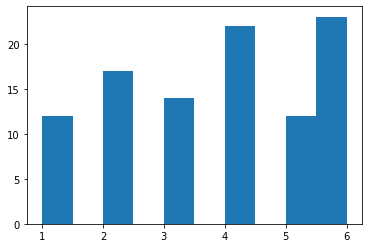

In [157]:
# We can visualize the count of values of the dices by plotting an histogram

plt.hist(roll_the_dice_hund['value'])

From the array and from the histogram, we can clearly see that the count of values is higher the higher the dice value. 
For example, the dice value 6 was thrown 23 times, followed by the dice value 4 which was thrown 22 time.
Also, the even dice values, compared to the odd dice values, recorded a total of higher throw. 

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

In [160]:
roll_the_dice_thous = pd.read_csv('/Users/GiadaSartori/Documents/IRONHACK/Lab/Week4/Descriptive-Stats/data/roll_the_dice_thousand.csv')
roll_the_dice_thous.head(10)

,Unnamed: 0,roll,value
0,0,0,5
1,1,1,6
2,2,2,1
3,3,3,6
4,4,4,5
5,5,5,2
6,6,6,6
7,7,7,5
8,8,8,6
9,9,9,6


In [161]:
# We plot the frequency of the roll_the_dice_thousands

# Option 1
freq_dist_rdt = roll_the_dice_thous['value'].value_counts().sort_index()
freq_dist_rdt

1    175
2    167
3    175
4    168
5    149
6    166
Name: value, dtype: int64

In [164]:
#Option 2

stats.mode(roll_the_dice_thous['value'])

ModeResult(mode=array([1]), count=array([175]))

(array([175.,   0., 167.,   0., 175.,   0., 168.,   0., 149., 166.]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ]),
 <BarContainer object of 10 artists>)

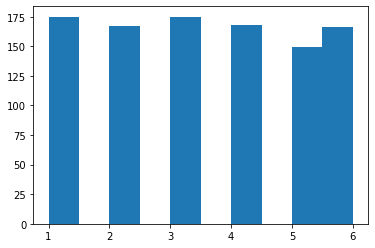

In [165]:
plt.hist(roll_the_dice_thous['value'])

From the array and from the histogram, we can clearly see that the dice values 1 and 3 were thrown the same amount of times, which is equal to 175. 
Also, the dice values are also more equally distributed, because our sample of dice throws is bigger than the one of dice thrown hundred times. 

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

In [167]:
#Read the age population file, and print the first 10 rows

age_population = pd.read_csv('/Users/GiadaSartori/Documents/IRONHACK/Lab/Week4/Descriptive-Stats/data/ages_population.csv')
age_population.head(10)

,observation
0,68.0
1,12.0
2,45.0
3,38.0
4,49.0
5,27.0
6,39.0
7,12.0
8,42.0
9,33.0


#### Calculating the frequency distribution of the dataframe age_population

In [170]:
#Option 1

freq_dist_ap = age_population['observation'].value_counts().sort_index()
freq_dist_ap

1.0     2
2.0     2
4.0     1
5.0     2
6.0     2
       ..
69.0    1
70.0    1
71.0    1
73.0    1
82.0    1
Name: observation, Length: 72, dtype: int64

In [171]:
#Option 2

stats.mode(age_population['observation'])

ModeResult(mode=array([39.]), count=array([45]))

(array([ 17.,  59., 115., 204., 261., 194.,  99.,  36.,  14.,   1.]),
 array([ 1. ,  9.1, 17.2, 25.3, 33.4, 41.5, 49.6, 57.7, 65.8, 73.9, 82. ]),
 <BarContainer object of 10 artists>)

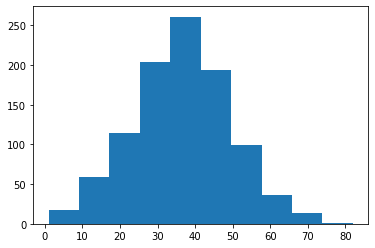

In [172]:
plt.hist(age_population['observation'])

Based on the array and histogram:
1) Mean is between the age group 30-40 years old
2) Standard deviation (a statistic that measures the dispersion of a dataset relative to its mean and is calculated as the square root of the variance) is between the agr group of 10 and 20 years old

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [173]:
#Calculation of the mean of observation

age_population['observation'].mean()

36.56

In [177]:
np.mean(age_population)

/Users/GiadaSartori/opt/anaconda3/envs/ironhack/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


observation    36.56
dtype: float64

In [174]:
#Calculation of the standard deviation of observation

np.std(age_population['observation'])

12.81008977329979

In [176]:
np.std(age_population)

observation    12.81009
dtype: float64

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

In [180]:
age_population_2 = pd.read_csv('/Users/GiadaSartori/Documents/IRONHACK/Lab/Week4/Descriptive-Stats/data/ages_population2.csv')
age_population_2.head(10)

,observation
0,25.0
1,31.0
2,29.0
3,31.0
4,29.0
5,29.0
6,28.0
7,30.0
8,24.0
9,26.0


####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [181]:
freq_dist_ap2 = age_population_2['observation'].value_counts().sort_index()
freq_dist_ap2

19.0      3
20.0     13
21.0     17
22.0     35
23.0     41
24.0     78
25.0     98
26.0    120
27.0    125
28.0    139
29.0    115
30.0     90
31.0     61
32.0     31
33.0     22
34.0      7
35.0      3
36.0      2
Name: observation, dtype: int64

In [182]:
stats.mode(age_population_2['observation'])

ModeResult(mode=array([28.]), count=array([139]))

(array([ 16.,  52., 119.,  98., 245., 254.,  90.,  92.,  29.,   5.]),
 array([19. , 20.7, 22.4, 24.1, 25.8, 27.5, 29.2, 30.9, 32.6, 34.3, 36. ]),
 <BarContainer object of 10 artists>)

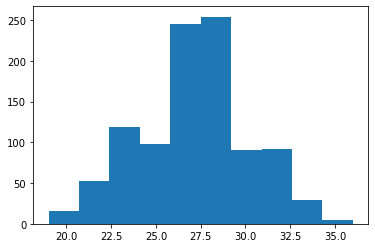

In [183]:
plt.hist(age_population_2['observation'])

Based on the array and histogram:
1) The most repeated age is 28, with 139 counts
2) Mean is between the age group 26.25 and 28.75
2) Standard deviation (a statistic that measures the dispersion of a dataset relative to its mean and is calculated as the square root of the variance) is between the agr group of 21 and 22.5 years old

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [185]:
#Mean

age_population_2['observation'].mean()

27.155

In [186]:
# Standard Deviation

np.std(age_population_2)

observation    2.968329
dtype: float64

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

In [187]:
# Read the csv file

age_population_3 = pd.read_csv('/Users/GiadaSartori/Documents/IRONHACK/Lab/Week4/Descriptive-Stats/data/ages_population3.csv')
age_population_3.head(10)

,observation
0,21.0
1,21.0
2,24.0
3,31.0
4,54.0
5,52.0
6,37.0
7,69.0
8,36.0
9,30.0


In [195]:
# Calculate the frequency distribution of age_population3

age_population_3['observation'].value_counts().sort_values(ascending=False)

32.0    37
35.0    31
37.0    31
39.0    29
36.0    26
        ..
76.0     1
8.0      1
9.0      1
1.0      1
7.0      1
Name: observation, Length: 75, dtype: int64

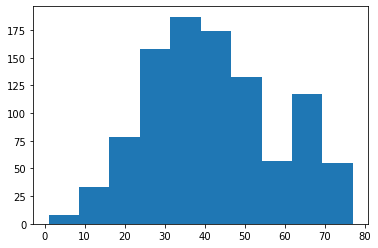

In [196]:
# Plot the value in a histogram chart

plt.hist(age_population_3['observation'])
plt.show()

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [188]:
# Mean

np.mean(age_population_3['observation'])

41.989

In [189]:
# Standard deviation

np.std(age_population_3['observation'])

16.136631587788084

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

Distribution of quartiles: 
1) q1 = 0.25
2) q2 = 0.50 (= to median)
3) q3 = 0.75
4) q4 = 1

#### Option 1

In [197]:
q1 = np.quantile(age_population_3['observation'], 0.25)
print('The first quartile is', q1)

The first quartile is 30.0


In [198]:
q2 = np.quantile(age_population_3['observation'], 0.50)
print('The first quartile is', q2)

The first quartile is 40.0


In [204]:
# To verify, we compute the median and see if it equals to q2

np.median(age_population_3['observation'])

40.0

In [199]:
q3 = np.quantile(age_population_3['observation'], 0.75)
print('The first quartile is', q3)

The first quartile is 53.0


In [200]:
q4 = np.quantile(age_population_3['observation'], 1)
print('The first quartile is', q4)

The first quartile is 77.0


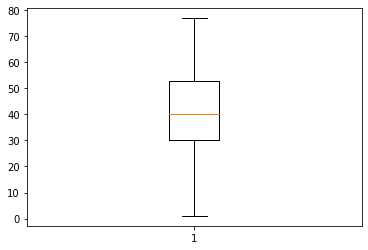

In [202]:
plt.boxplot(age_population_3)
plt.show()

#### Option 2

In [207]:
age_population_3.quantile([0.25, 0.50, 0.75, 1.0])

,observation
0.25,30.0
0.50,40.0
0.75,53.0
1.00,77.0


When computing the quartiles of our sample, we realize that our mean (= 41.989 yo) and median or q2(= 40 yo) are very close. 
Also, while the first and second quartile are relatively close, the difference between the third and fourth quartiles are big in comparison.

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [211]:
q_outlier1 = np.quantile(age_population_3['observation'], 0.1)
print('The minimum outlier is', q_outlier1)

The minimum outlier is 22.0


In [213]:
q_outlier3 = np.quantile(age_population_3['observation'], 0.05)
print('The minimum outlier is', q_outlier3)

The minimum outlier is 17.0


In [212]:
q_outlier2 = np.quantile(age_population_3['observation'], 0.9)
print('The maximum outlier is', q_outlier2)

The maximum outlier is 67.0


In [214]:
q_outlier4 = np.quantile(age_population_3['observation'], 0.95)
print('The maximum outlier is', q_outlier4)

The maximum outlier is 70.0


Our sample indicates that a young person is around 17 and 22 years old.
Our sample also indicated that a senior person is 67 and 70 years old.

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""